<a href="https://colab.research.google.com/github/LeoDinga/DL_Project/blob/main/test_sample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip uninstall -y torch torchvision torchao torchaudio torchtext torchdata
!pip uninstall -y mmcv mmcv-full mmengine mmaction2 transformers

Found existing installation: torch 2.0.1+cu118
Uninstalling torch-2.0.1+cu118:
  Successfully uninstalled torch-2.0.1+cu118
Found existing installation: torchvision 0.15.2+cu118
Uninstalling torchvision-0.15.2+cu118:
  Successfully uninstalled torchvision-0.15.2+cu118
Found existing installation: mmcv 2.1.0
Uninstalling mmcv-2.1.0:
  Successfully uninstalled mmcv-2.1.0
Found existing installation: mmengine 0.10.7
Uninstalling mmengine-0.10.7:
  Successfully uninstalled mmengine-0.10.7
Found existing installation: mmaction2 1.2.0
Uninstalling mmaction2-1.2.0:
  Successfully uninstalled mmaction2-1.2.0
Found existing installation: transformers 4.35.2
Uninstalling transformers-4.35.2:
  Successfully uninstalled transformers-4.35.2


In [2]:
!pip install -U openmim
!mim install mmengine
!mim install 'mmcv==2.1.0'
!pip install torch==2.0.1 torchvision==0.15.2 --index-url https://download.pytorch.org/whl/cu118
!pip install transformers==4.35.2
!pip install mmaction2

Traceback (most recent call last):
  File "/usr/local/bin/mim", line 8, in <module>
    sys.exit(cli())
             ^^^^^
  File "/usr/local/lib/python3.11/dist-packages/click/core.py", line 1442, in __call__
    return self.main(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/click/core.py", line 1363, in main
    rv = self.invoke(ctx)
         ^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/click/core.py", line 1830, in invoke
    return _process_result(sub_ctx.command.invoke(sub_ctx))
                           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/click/core.py", line 1226, in invoke
    return ctx.invoke(self.callback, **ctx.params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/click/core.py", line 794, in invoke
    return callback(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3

In [3]:
# verifica se tens o GPU ativado. Tem de dizer TRUE
# import numpy as np
import torch
print(f"PyTorch Version: {torch.__version__}")
print(f"CUDA Available: {torch.cuda.is_available()}")
print(f"CUDA Version used by PyTorch: {torch.version.cuda}")

PyTorch Version: 2.0.1+cu118
CUDA Available: False
CUDA Version used by PyTorch: 11.8


In [8]:

# Exemplo para MMAction2
!git clone https://github.com/open-mmlab/mmaction2.git mmaction2 #alterei
%cd mmaction2
!pip install -e .

fatal: destination path 'mmaction2' already exists and is not an empty directory.
/content/mmaction2
Obtaining file:///content/mmaction2
  Preparing metadata (setup.py) ... done
  Attempting uninstall: mmaction2
    Found existing installation: mmaction2 1.2.0
    Uninstalling mmaction2-1.2.0:
      Successfully uninstalled mmaction2-1.2.0
  Running setup.py develop for mmaction2


In [4]:
!mim install 'mmcv==2.1.0'

Looking in links: https://download.openmmlab.com/mmcv/dist/cu118/torch2.0.0/index.html
  Using cached https://download.openmmlab.com/mmcv/dist/cu118/torch2.0.0/mmcv-2.1.0-cp311-cp311-manylinux1_x86_64.whl (98.6 MB)
  Using cached mmengine-0.10.7-py3-none-any.whl.metadata (20 kB)
Using cached mmengine-0.10.7-py3-none-any.whl (452 kB)


In [5]:
import mmcv
# import mmengine #not sure
import mmaction2

In [6]:
import sys
sys.path.append('mmaction2')

In [7]:
import os
from google.colab import drive
drive.mount('/content/drive')


save_path = '/content/drive/MyDrive/mmaction2_work_dir/stgcn_treino'
os.makedirs(save_path, exist_ok=True)

Mounted at /content/drive


In [12]:

!pip uninstall -y numpy
!pip install numpy==1.26.4

import numpy

Found existing installation: numpy 2.2.6
Uninstalling numpy-2.2.6:
  Successfully uninstalled numpy-2.2.6
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 89.4 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchtune 0.6.1 requires torchdata==0.11.0, which is not installed.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
yfinance 0.2.61 requires requests>=2.31, but you have requests 2.28.2 which is incompatible.
sentence-transformers 4.1.0 requires transformers<5.0.0,>=4.41.0, but you have transformers 4.35.2 which is incompatible.
pytensor 2.31.2 requires filelock>=3.15, but you have filelock 3.14.0 which is incompatible.
pymc 5.23.0 requires rich>=13.7.1, but you have rich 13.4.2 which is incompatible.


In [6]:

config_code = """

_base_ = ['/content/mmaction2/configs/_base_/default_runtime.py']
model = dict(
    type='RecognizerGCN',
    backbone=dict(
        type='STGCN',
        graph_cfg=dict(layout='nturgb+d', mode='stgcn_spatial'),
        in_channels=3
    ),
    cls_head=dict(type='GCNHead', num_classes=12, in_channels=256)
)

train_pipeline = [
    dict(type='PreNormalize3D'),
    dict(type='GenSkeFeat', dataset='nturgb+d', feats=['j']),
    dict(type='UniformSampleFrames', clip_len=100),
    dict(type='PoseDecode'),
    dict(type='FormatGCNInput', num_person=1),
    dict(type='PackActionInputs')
]
val_pipeline = [
    dict(type='PreNormalize3D'),
    dict(type='GenSkeFeat', dataset='nturgb+d', feats=['j']),
    dict(type='UniformSampleFrames', clip_len=100, num_clips=1, test_mode=True),
    dict(type='PoseDecode'),
    dict(type='FormatGCNInput', num_person=1),
    dict(type='PackActionInputs')
]
test_pipeline = [
    dict(type='PreNormalize3D'),
    dict(type='GenSkeFeat', dataset='nturgb+d', feats=['j']),
    dict(type='UniformSampleFrames', clip_len=100, num_clips=1, test_mode=True),
    dict(type='PoseDecode'),
    dict(type='FormatGCNInput', num_person=1),
    dict(type='PackActionInputs')
]

train_dataloader = dict(
    batch_size=64,  # ALTERADO: era 16, agora 4 para teste rápido
    num_workers=2,
    persistent_workers=True,
    sampler=dict(type='DefaultSampler', shuffle=True),
    dataset=dict(
        type='PoseDataset',
        ann_file='/content/train_labels.pkl',  # ALTERADO: caminho absoluto, antes era 'train_labels.pkl'
        pipeline=train_pipeline
    )
  )

val_dataloader = dict(
    batch_size=64,  # ALTERADO: era 16, agora 4 para teste rápido
    num_workers=2,
    persistent_workers=True,
    sampler=dict(type='DefaultSampler', shuffle=False),
    dataset=dict(
        type='PoseDataset',
        ann_file='/content/val_labels.pkl',  # ALTERADO: caminho absoluto, antes era 'val_labels.pkl'
        pipeline=val_pipeline
    )
)
test_dataloader = dict(
    batch_size=64,  # ALTERADO: era 16, agora 4 para teste rápido
    num_workers=2,
    persistent_workers=True,
    sampler=dict(type='DefaultSampler', shuffle=False),
    dataset=dict(
      type='PoseDataset',
      ann_file='/content/our_test_labels.pkl',  # Pode ser .txt MUDEI
      pipeline=test_pipeline
)

)



param_scheduler = [
    dict(
        type='CosineAnnealingLR',
        eta_min=0,
        T_max=16,
        by_epoch=True,
        convert_to_iter_based=True)
]

evaluation = dict(
    interval=2,
    metrics=['top_k_accuracy']
)

val_evaluator = [dict(type='AccMetric')]
test_evaluator = val_evaluator



train_cfg = dict(
    type='EpochBasedTrainLoop', max_epochs=50, val_begin=1, val_interval=1)
val_cfg = dict(type='ValLoop')
test_cfg = dict(type='TestLoop')


optim_wrapper = dict(
    optimizer=dict(
        type='SGD', lr=0.1, momentum=0.9, weight_decay=0.0005, nesterov=True)
)


# Salvar checkpoints, logs, etc.
work_dir = '/content/drive/MyDrive/mmaction2_work_dir/stgcn_treino'   # ALTERADO: era './work_dirs/stgcn_3d_custom_test'

load_from = 'https://download.openmmlab.com/mmaction/v1.0/skeleton/stgcn/stgcn_8xb16-joint-u100-80e_ntu60-xsub-keypoint-3d/stgcn_8xb16-joint-u100-80e_ntu60-xsub-keypoint-3d_20221129-850308e1.pth'



"""

# Gravar para o ficheiro na pasta configs/stgcn/
with open('/content/mmaction2/configs/stgcn_3d_custom.py', 'w') as f:
    f.write(config_code)

In [13]:
!python tools/test.py configs/stgcn_3d_custom.py /content/drive/MyDrive/mmaction2_work_dir/stgcn_treino/epoch_50.pth --dump /content/drive/MyDrive/mmaction2_work_dir/stgcn_test_50/results.pkl


06/04 23:06:25 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: linux
    Python: 3.11.12 (main, Apr  9 2025, 08:55:54) [GCC 11.4.0]
    CUDA available: False
    MUSA available: False
    numpy_random_seed: 572619725
    GCC: x86_64-linux-gnu-gcc (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0
    PyTorch: 2.0.1+cu118
    PyTorch compiling details: PyTorch built with:
  - GCC 9.3
  - C++ Version: 201703
  - Intel(R) oneAPI Math Kernel Library Version 2022.2-Product Build 20220804 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v2.7.3 (Git Hash 6dbeffbae1f23cbbeae17adb7b5b13f1f37c080e)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - LAPACK is enabled (usually provided by MKL)
  - NNPACK is enabled
  - CPU capability usage: AVX2
  - Build settings: BLAS_INFO=mkl, BUILD_TYPE=Release, CUDA_VERSION=11.8, CUDNN_VERSION=8.7.0, CXX_COMPILER=/opt/rh/devtoolset-9/root/usr/bin/c++, CXX_FLAGS= -D_GLIBCXX_USE_CXX11_ABI=0 -fabi-v

In [1]:
!pip install pickle

!pip uninstall -y numpy scikit-learn pandas matplotlib

!pip install numpy==1.26.4 scikit-learn==1.4.2 pandas==2.2.2 matplotlib==3.8.4

import numpy, sklearn, pandas, matplotlib


ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle
Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Successfully uninstalled numpy-1.26.4
Found existing installation: scikit-learn 1.4.2
Uninstalling scikit-learn-1.4.2:
  Successfully uninstalled scikit-learn-1.4.2
Found existing installation: pandas 2.2.2
Uninstalling pandas-2.2.2:
  Successfully uninstalled pandas-2.2.2
Found existing installation: matplotlib 3.8.4
Uninstalling matplotlib-3.8.4:
  Successfully uninstalled matplotlib-3.8.4
  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached scikit_learn-1.4.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
  Using cached pandas-2.2.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (19 kB)
  Using cached matplotlib-3.8.4-cp311-cp311-manylinux_2_17_x86_64.manylinux

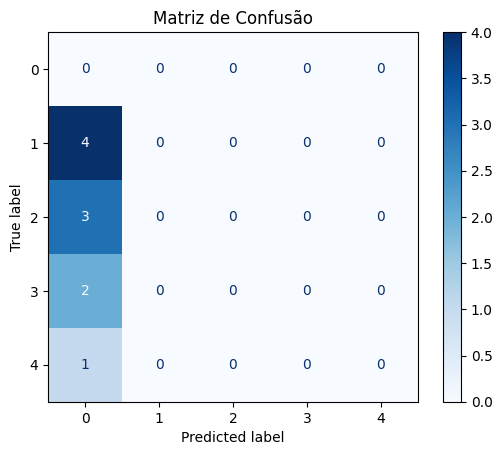

In [2]:
import pickle
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Caminho para o ficheiro de resultados gerado pelo MMAction2
results_path = '/content/drive/MyDrive/mmaction2_work_dir/stgcn_test_50/results.pkl'

# Carregar resultados
with open(results_path, 'rb') as f:
    results = pickle.load(f)

# Extrair predições (assumindo que são probabilidades ou logits)
# Se results[i] é um array de probabilidades/logits para cada classe:
y_pred = [np.argmax(r) for r in results]

# Carregar os rótulos verdadeiros (ground truth)
# Supondo que tem um ficheiro pkl com os rótulos dos dados de teste
with open('/content/our_test_labels.pkl', 'rb') as f:
    data = pickle.load(f)
    # Ajuste conforme a estrutura do seu ficheiro de labels
    y_true = [item['label'] for item in data]

# Gerar matriz de confusão
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('Matriz de Confusão')
plt.show()


In [7]:
import pickle
import numpy as np

# Carregar os dados de teste
with open('/content/our_test_labels.pkl', 'rb') as f:
    test_data = pickle.load(f)
    y_true = [item['label'] for item in test_data]
    frame_dirs = [item['frame_dir'] for item in test_data]

# Carregar as predições
with open('/content/drive/MyDrive/mmaction2_work_dir/stgcn_test_50/results.pkl', 'rb') as f:
    results = pickle.load(f)
    y_pred = [np.argmax(r) for r in results]

# Lista de nomes das classes (ajuste para o seu caso)
class_names = ['classe_0', 'classe_1', 'classe_2', 'classe_3', 'classe_4', 'classe_5',
               'classe_6', 'classe_7', 'classe_8', 'classe_9', 'classe_10', 'classe_11']

# Mostrar os resultados dos primeiros samples
for idx in range(10):  # Mostra os 10 primeiros, ajuste como quiser
    print(f"Sample: {frame_dirs[idx]}")
    print(f"Label correta: {class_names[y_true[idx]]}")
    print(f"Label prevista: {class_names[y_pred[idx]]}")
    print("-" * 40)


Sample: sample_0
Label correta: classe_1
Label prevista: classe_0
----------------------------------------
Sample: sample_1
Label correta: classe_1
Label prevista: classe_0
----------------------------------------
Sample: sample_2
Label correta: classe_4
Label prevista: classe_0
----------------------------------------
Sample: sample_3
Label correta: classe_1
Label prevista: classe_0
----------------------------------------
Sample: sample_4
Label correta: classe_5
Label prevista: classe_0
----------------------------------------
Sample: sample_5
Label correta: classe_5
Label prevista: classe_0
----------------------------------------
Sample: sample_6
Label correta: classe_4
Label prevista: classe_0
----------------------------------------
Sample: sample_7
Label correta: classe_6
Label prevista: classe_0
----------------------------------------
Sample: sample_8
Label correta: classe_4
Label prevista: classe_0
----------------------------------------
Sample: sample_9
Label correta: class